In [2]:
import numpy as np 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.datasets import mnist
from keras.utils import np_utils

Using TensorFlow backend.


In [3]:
#load shit
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 99s 9us/step


In [4]:
train_data.shape

(60000, 28, 28)

In [5]:
train_data = train_data.reshape(train_data.shape[0],28,28,1)
test_data = test_data.reshape(test_data.shape[0],28,28,1)

In [6]:
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

In [7]:
train_data = train_data / 255
test_data = test_data / 255

In [8]:
#label one-hot encoding
OH_train_label = np_utils.to_categorical(train_labels)
OH_test_label = np_utils.to_categorical(test_labels)

In [9]:
#set up model
convnet = Sequential()
convnet.add(Conv2D(32, kernel_size=(4, 4), activation ='tanh', input_shape = (28,28,1)))
convnet.add(MaxPooling2D(pool_size=(2,2)))
convnet.add(Conv2D(32, kernel_size=(3, 3), activation = 'tanh'))
convnet.add(MaxPooling2D(pool_size=(2,2)))
convnet.add(Dropout(0.3))
convnet.add(Flatten())
convnet.add(Dense(10, activation='softmax'))

In [10]:
#set up model parameters 
convnet.compile(loss='mean_squared_error',optimizer='Adam', metrics=['accuracy'])

In [11]:
convnet.fit(train_data, OH_train_label, batch_size=64, epochs=10, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 42s 702us/step - loss: 0.0124 - acc: 0.9181
Epoch 2/10
60000/60000 [==============================] - 42s 703us/step - loss: 0.0045 - acc: 0.9713
Epoch 3/10
60000/60000 [==============================] - 40s 672us/step - loss: 0.0036 - acc: 0.9769
Epoch 4/10
60000/60000 [==============================] - 44s 737us/step - loss: 0.0032 - acc: 0.9794
Epoch 5/10
60000/60000 [==============================] - 41s 687us/step - loss: 0.0029 - acc: 0.9812
Epoch 6/10
60000/60000 [==============================] - 40s 670us/step - loss: 0.0027 - acc: 0.9826
Epoch 7/10
60000/60000 [==============================] - 40s 665us/step - loss: 0.0025 - acc: 0.9837
Epoch 8/10
60000/60000 [==============================] - 39s 657us/step - loss: 0.0024 - acc: 0.9845
Epoch 9/10
60000/60000 [==============================] - 39s 655us/step - loss: 0.0023 - acc: 0.9848
Epoch 10/10
60000/60000 [==============================] - 39s 656us/step - loss: 

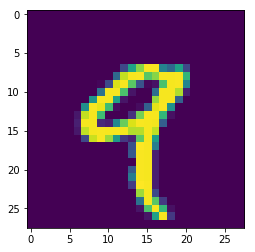

In [30]:
import matplotlib.pyplot as plt
plt.imshow(train_data[4,:,:,0])

In [24]:
train_data.shape

(60000, 28, 28, 1)

In [28]:
train_data[4,:,:].shape

(28, 28, 1)